In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load the dataset
file_path = "/content/Final_Processed_Data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Step 2: Define the target column and split features and target
target_column = 'y'  # Replace 'y' with your actual target column name
X = df.drop(columns=[target_column])  # Features (all columns except the target)
y = df[target_column]  # Target variable (the column you want to predict)

# Step 3: Check and handle missing values in feature columns
if X.isnull().sum().sum() > 0:
    print(f"Missing values in feature columns: \n{X.isnull().sum()}")
    # Option 1: Drop rows with missing feature values
    df = df.dropna(subset=X.columns)
    # Option 2: Impute missing values with mean (if you prefer imputation)
    # X.fillna(X.mean(), inplace=True)

    # Re-define X and y after handling missing values
    X = df.drop(columns=[target_column])
    y = df[target_column]

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the Random Forest Classification model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 8: Optional - Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)


Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      6870
           1       0.61      0.38      0.47       593

    accuracy                           0.93      7463
   macro avg       0.78      0.68      0.72      7463
weighted avg       0.92      0.93      0.92      7463


Confusion Matrix:
[[6730  140]
 [ 370  223]]

Feature Importances:
                          Feature    Importance
1                        duration  3.055331e-01
8                       euribor3m  9.970383e-02
0                             age  9.912466e-02
2                        campaign  4.608403e-02
9                     nr.employed  4.337233e-02
7                   cons.conf.idx  2.823475e-02
6                  cons.price.idx  2.690971e-02
34                    housing_yes  2.272521e-02
5                    emp.var.rate  2.227087e-02
21                marital_married  1.587955e-02
36                       loan_yes  1.5

# Neural Network Model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8998 - loss: 0.2544 - val_accuracy: 0.9232 - val_loss: 0.1670
Epoch 2/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9254 - loss: 0.1653 - val_accuracy: 0.9250 - val_loss: 0.1649
Epoch 3/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.1620 - val_accuracy: 0.9234 - val_loss: 0.1664
Epoch 4/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9270 - loss: 0.1558 - val_accuracy: 0.9254 - val_loss: 0.1635
Epoch 5/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9296 - loss: 0.1497 - val_accuracy: 0.9259 - val_loss: 0.1641
Epoch 6/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9298 - loss: 0.1547 - val_accuracy: 0.9256 - val_loss: 0.1644
Epoch 7/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9292 - loss: 0.1508 - val_accuracy: 0.9252 - val_loss: 0.1612
Epoch 8/50
933/933 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9328 - loss: 0.1458 - val_accuracy: 0.

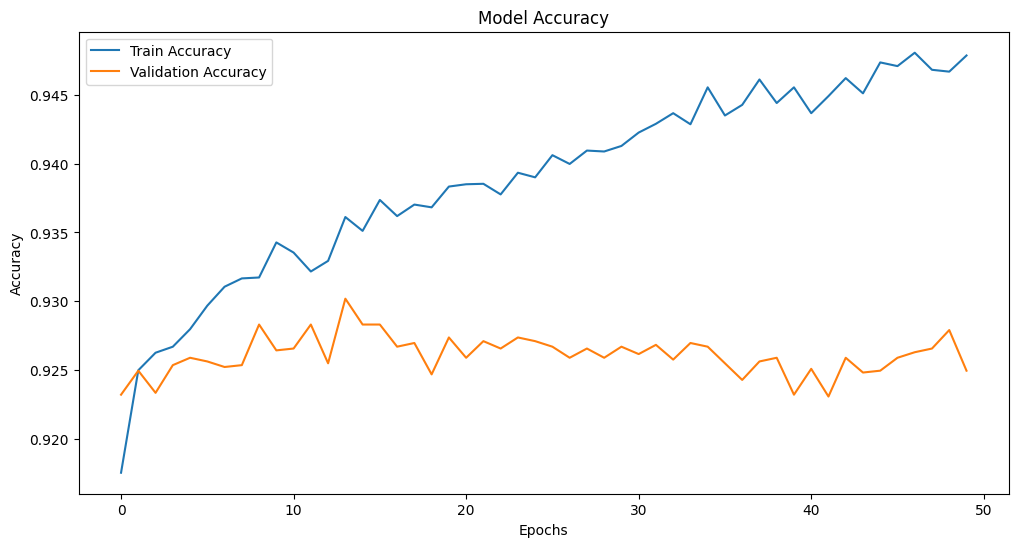

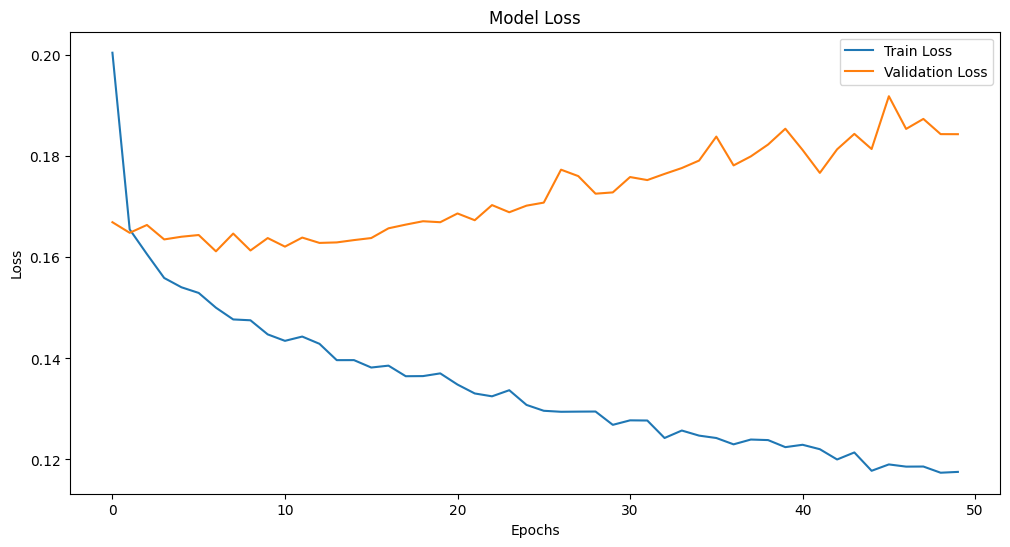

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Load the dataset
file_path = "/content/Final_Processed_Data.csv"  # Update with your file path
df = pd.read_csv(file_path)

# Step 2: Handle missing values (e.g., drop rows with NaN or fill them)
df = df.dropna()  # Alternatively, you can use df.fillna() to impute missing values

# Step 3: Define features (X) and target (y)
target_column = 'y'  # Replace 'y' with your actual target column name
X = df.drop(columns=[target_column])
y = df[target_column]

# Step 4: Preprocess the data
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features for better performance of neural networks
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert target variable to categorical (one-hot encoding) if necessary
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Step 5: Build the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),  # Input layer with 128 neurons
    Dropout(0.3),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.3),  # Dropout for regularization
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Step 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,  # Number of training epochs
    batch_size=32,  # Batch size
    validation_data=(X_test, y_test),
    verbose=1  # Verbosity level for training output
)

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 9: Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Optional: Generate classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# Optional: Visualize training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
